## 0. Central Limit Theorem

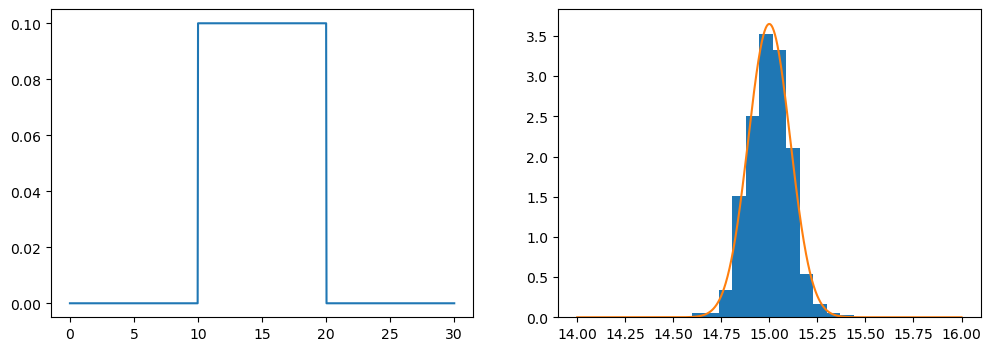

mean
14.999508703590774
15
sigma
0.10930190900606682
0.1091089451179962


In [39]:
x = scipy.stats.uniform(10,10)      # uniform distribution between 10 and 20
xgrid = np.linspace(0,30,1000)
pdf = x.pdf(xgrid)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.plot(xgrid, pdf)

mean = []
N = 700
for i in range(500):
    samples = x.rvs(N)
    mean.append(np.mean(samples))

mu, std = scipy.stats.norm.fit(mean)
Normpdf = scipy.stats.norm.pdf(np.linspace(14,16,1000), mu, std)

ax = fig.add_subplot(122)
ax.hist(mean,12, density=True)
ax.plot(np.linspace(14,16,1000), Normpdf)

plt.show()

print('mean')
print(mu)
print(15)
print('sigma')
print(std)
print(10/np.sqrt(12*N))

## Cloning quasars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random 
from tqdm import tqdm

In [2]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']
z

array([1.8246, 1.8373, 1.1985, ..., 1.7592, 1.4597, 1.8671], dtype=float32)

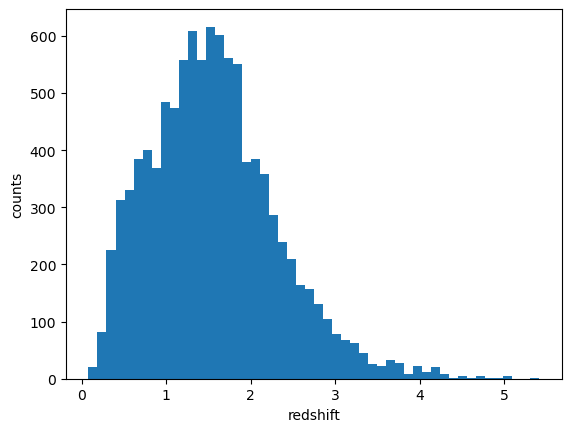

In [14]:
plt.hist(z,50)
plt.xlabel('redshift')
plt.ylabel('counts')
plt.show()

### Rejection sampling

In [15]:
counts, bins = np.histogram(z, bins=50, density=True)

In [16]:
disth = scipy.stats.rv_histogram((counts,bins))

In [21]:
proposal = scipy.stats.uniform(min(bins), min(bins)+max(bins))   # proposal distribution q(x)
N = 10000
x_prop = proposal.rvs(N)                         # N random samples from q(x)
u = scipy.stats.uniform(0,max(counts)).rvs(N)    # N random samples from Uniform(0,max(h))

x_accepted = []
for i in range(len(x_prop)):
    if u[i] <= disth.pdf(x_prop[i]):     # condition for acceptance
        x_accepted.append( x_prop[i] )

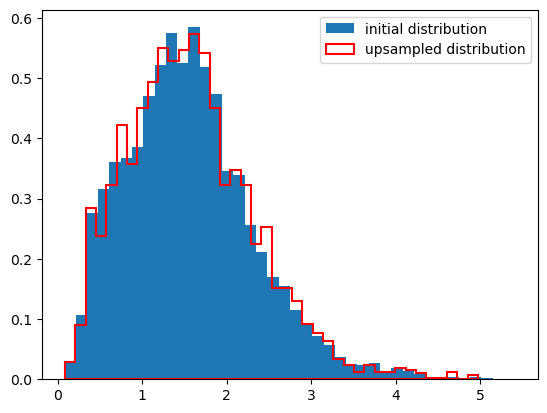

In [22]:
plt.hist(z, 40,density=True,label='initial distribution')
plt.hist(x_accepted, 40,fc='None',ec='r',histtype='stepfilled',linewidth=1.5,density=True,label='upsampled distribution')
plt.legend()
plt.show()

### Inverse transform sampling

/home/sandokan/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/sandokan/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


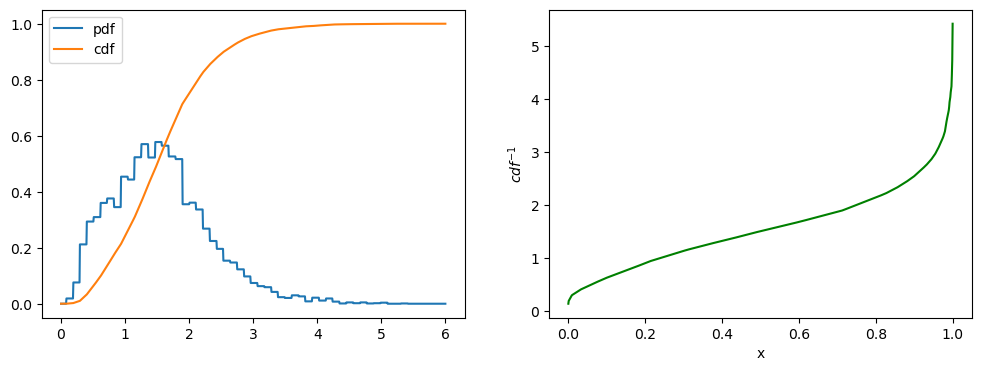

In [82]:
xgrid = np.linspace(0,6,1000)
pdf = disth.pdf(xgrid)
cdf = disth.cdf(xgrid)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.plot(xgrid,pdf,label='pdf')
ax.plot(xgrid,cdf,label='cdf')
ax.legend()

# inverse of the cdf
cdf_1 = scipy.interpolate.interp1d(cdf, xgrid, kind='linear', fill_value='extrapolate')     
ygrid = np.linspace(0,1,len(xgrid))

ax = fig.add_subplot(122)
ax.plot(ygrid,cdf_1(ygrid),c='g')
ax.set_xlabel('x')
ax.set_ylabel('$cdf^{-1}$')

plt.show()

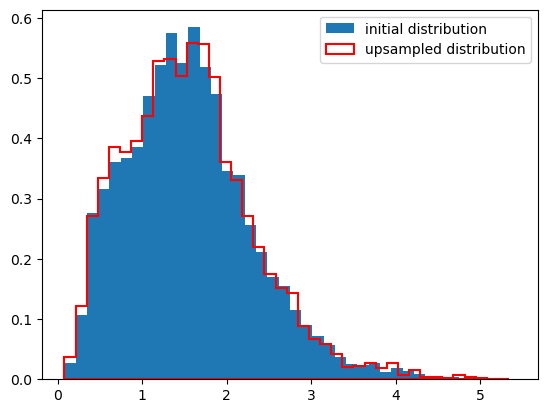

In [87]:
u_sample = scipy.stats.uniform(0,1).rvs(N)    # generate random samples u from Uniform(0,1)
x_sample = cdf_1(u_sample)                    # comute H^-1(u)

plt.hist(z, 40,density=True, label='initial distribution')
plt.hist(x_sample, 40, fc='None',ec='r',histtype='stepfilled',linewidth=1.5,density=True,label='upsampled distribution')
plt.legend()
plt.show()

### Comparison

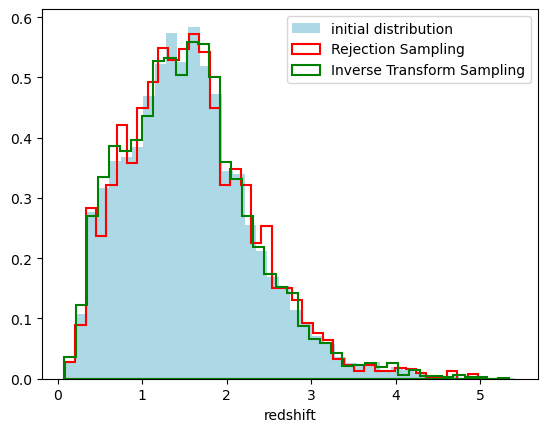

In [88]:
plt.hist(z, 40, density=True, fc='lightblue', label='initial distribution')
plt.hist(x_accepted, 40, fc='None',ec='r',histtype='stepfilled',linewidth=1.5,density=True,label='Rejection Sampling')
plt.hist(x_sample, 40, fc='None',ec='g',histtype='stepfilled',linewidth=1.5,density=True,label='Inverse Transform Sampling')
plt.legend()
plt.xlabel('redshift')
plt.show()

### Theoretical distribution

In [99]:
from astropy.cosmology import Planck18

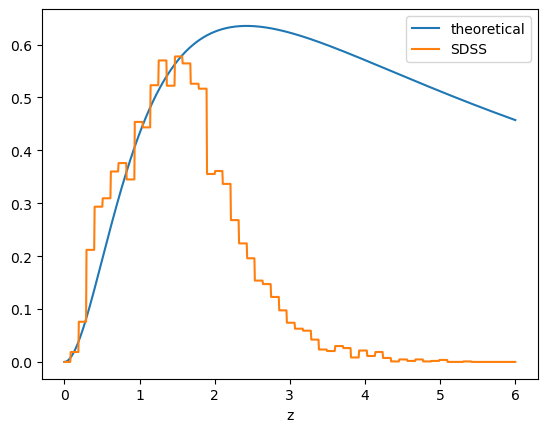

In [122]:
zgrid = np.linspace(0,6,500)

# dV/dz/dΩ 
dVc_dz_dOmega = Planck18.differential_comoving_volume(zgrid).value  

# dV/dz 
dVc_dz = dVc_dz_dOmega * 4 * np.pi  

k = 1.2e-12
plt.plot(zgrid, k*dVc_dz, label='theoretical')
plt.plot(xgrid, pdf, label='SDSS')
plt.xlabel('z')
plt.legend()
plt.show()